In [1]:
%load_ext watermark

In [7]:
%watermark -v -d -z -a 'Seema Mishra' -p sklearn,matplotlib,numpy,pandas

Seema Mishra 2017-09-26 PDT

CPython 2.7.13
IPython 5.3.0

sklearn 0.19.0
matplotlib 2.0.2
numpy 1.13.1
pandas 0.20.1


In [ ]:
%matplotlib inline

### Principal Component Analysis:

1. **Standarize the data set: Putting all data into same scale**

2. **Eigendecomposition- Computing Eigen vectors and Eigen vlaues**
    * Computation of Covariacne matrix
    * Correlation matrix
    * Singualr Value Decompostion
    
3. **Selecting Principal Components**
    * Soritng eigen pairs
    * Explained Variance
    * Projection Matrix
    
4. **Project onto new feature space**



### Introduction

The sheer size of data in the modern age is not only a challenge for computer hardware but also a main bottleneck for the performance of many machine learning algorithms. The main goal of a PCA analysis is to identify patterns in data; PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense. In a nutshell, this is what PCA is all about: Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.

In [8]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Problem Definition


In [128]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")
sys.path.append("../test/")
sys.path.append("../datasets/")
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from feature_format import featureFormat, targetFeatureSplit

from pprint import pprint
%matplotlib inline
import numpy as np

In [188]:
### Load the dictionary containing the dataset
data_dict = pickle.load(open("/Users/seemamishra/Documents/Udacity/Intro to machine learning/ud120-projects/final_project/Enron Fraud Detection/datasets/final_project_dataset.pkl", "r"))

In [190]:
def to_pandas(dict):
    df = pd.DataFrame.from_dict(dict, orient='index')
#     df.reset_index(level=0, inplace=True)
    columns = list(df.columns)
#     columns[0] = 'name'
    df.columns = columns
    return(df)

In [191]:
Enron_data = to_pandas(data_dict)

Enron_data.replace('NaN', np.nan, inplace = True)
Enron_data = Enron_data.fillna(0)
# Enron_data

In [192]:
data = Enron_data
list(Enron_data.columns)

['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'email_address',
 'from_poi_to_this_person']

In [123]:
# Enron_data['poi'] = Enron_data['poi'].map({'True': 1, 'False': 0})


In [193]:
del data['email_address']

In [194]:
list(data.columns)

['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'from_poi_to_this_person']

In [195]:
data = data[['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'from_poi_to_this_person',
            'poi']]




In [231]:
# data['poi']

Now our neron data is stored in 146X19 matrix where columns are different feartures


In [230]:
d = data
data['poi'].replace(['non_poi','poi'],['0','1'],inplace=True)

# data['poi']

In [225]:
X = data.ix[:,0:18].values
y = data.ix[:,19].values

y


array(['0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0',
       '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '0'], dtype=object)

### 1. Standardize the dataset

In [205]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std

array([[-0.0746153 ,  0.75723808,  0.88982089, ..., -0.16370137,
        -1.13847635, -0.08925145],
       [-0.16657959, -0.55048066, -0.09510396, ..., -0.16370137,
         0.16149683, -0.16484433],
       [-0.16636238, -0.29542594, -0.1606183 , ..., -0.16370137,
         0.15934332, -0.16484433],
       ..., 
       [-0.16657959, -0.55048066, -0.1606183 , ..., -0.16370137,
         0.16149683, -0.16484433],
       [-0.09444758, -0.55048066, -0.1606183 , ..., -0.16370137,
         0.16149683, -0.16484433],
       [-0.16657959, -0.55048066, -0.1606183 , ..., -0.16370137,
         0.16149683, -0.16484433]])

### 2.  Eigendecomposition - Computing Eigenvectors and Eigenvalues
The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude(strength/variance). In other words, the eigenvalues explain the variance of the data along the new feature axes.

### Computing Covariance matrix

The classic approach to PCA is to perform the eigendecomposition on the covariance matrix $\Sigma$, which is a $d \times d$ matrix where each element represents the covariance between two features. The covariance between two features is calculated as follows:

$\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}\left(  x_{ij}-\bar{x}_j \right)  \left( x_{ik}-\bar{x}_k \right).$

We can summarize the calculation of the covariance matrix via the following matrix equation:   
$\Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)$  
where $\mathbf{\bar{x}}$ is the mean vector 
$\mathbf{\bar{x}} = \sum\limits_{i=1}^n x_{i}.$  
The mean vector is a $d$-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.

In [206]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)


Covariance matrix 
[[ 1.00689655 -0.0101416   0.97072024  0.96297289  0.99339207  1.0001615
   0.99469657 -0.00795807 -0.44810419  0.99631058  1.00084227  0.74119451
  -0.00777369  0.96992263 -0.00693036  0.96107722 -0.97774868  0.99700124]
 [-0.0101416   1.00689655 -0.00974101  0.02155821 -0.02917952  0.03388485
  -0.01538007  0.88814568 -0.00450933 -0.02485281 -0.02002066  0.04854859
   0.51232334 -0.01122529  0.61016347 -0.08854795  0.01318378 -0.01235538]
 [ 0.97072024 -0.00974101  1.00689655  0.92831447  0.95822666  0.96471628
   0.95658655  0.00599967 -0.43341001  0.96012431  0.96276964  0.69523696
  -0.0119291   0.95335021 -0.02390082  0.92820155 -0.97489647  0.96028491]
 [ 0.96297289  0.02155821  0.92831447  1.00689655  0.97174248  0.96868162
   0.97205591  0.0323742  -0.38087714  0.97488831  0.95184309  0.90187318
  -0.01662681  0.98960326 -0.00372937  0.91658346 -0.92948304  0.96702612]
 [ 0.99339207 -0.02917952  0.95822666  0.97174248  1.00689655  0.99015618
   0.99295556 -0

In [50]:
# print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

### Eigen Decomposition on Covariance Matirx

In [207]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ -2.81727847e-01   4.27899049e-03   2.05487415e-02  -2.43188626e-02
   -1.23974792e-01  -2.42790124e-02   4.90823519e-02   8.54209060e-02
   -1.40168242e-01  -1.04874499e-01  -1.46973981e-01   1.68754295e-01
   -1.05631414e-01  -1.10550420e-02   1.39048736e-01   8.79751638e-01
    8.37254335e-02   4.02443975e-02]
 [  4.00561822e-03   5.56739435e-01  -2.56125501e-01   1.59659007e-01
   -3.23606457e-02  -2.51491503e-01   5.90185150e-01  -4.18204118e-01
   -2.32453153e-02   5.83834408e-02  -7.55833485e-02   1.93919258e-02
    3.86636078e-03   3.88701951e-03   3.45195490e-02  -1.28835444e-02
   -1.47969916e-05   7.08204956e-06]
 [ -2.73880172e-01   2.76459099e-03   9.22445081e-03  -1.34221181e-02
   -1.91924015e-01  -8.87496295e-02  -3.48909589e-01  -5.31972626e-01
    3.59687805e-01  -3.16155624e-01   2.28678448e-01   3.43137234e-01
    1.78208997e-01   1.22003360e-01  -1.43970533e-01  -1.84610133e-02
    7.53739933e-02   5.01312946e-02]
 [ -2.77424455e-01   1.89713330e-02

In [208]:
# Calculating using correlation matrix also
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

# print('Eigenvectors \n%s' %eig_vecs)
# print('\nEigenvalues \n%s' %eig_vals)

### Singular Vector Decomposition

While the eigendecomposition of the covariance or correlation matrix may be more intuitiuve, most PCA implementations perform a Singular Vector Decomposition (SVD) to improve the computational efficiency. So, let us perform an SVD to confirm that the result are indeed the same:

In [209]:
u,s,v = np.linalg.svd(X_std.T)
# print('Vectors U:\n', u)

In [210]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


### Selecting principal components


In [211]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
12.4208785313
2.74714773576
0.849484563622
0.801496375659
0.473150915869
0.361301577042
0.104474893282
0.0691545653281
0.0580876078237
0.0341130753709
0.0253552278529
0.0212103186283
0.0150056933347
0.0105241515674
0.00589758817591
0.00267709177053
4.00590959682e-05
2.85584294859e-08


In [212]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

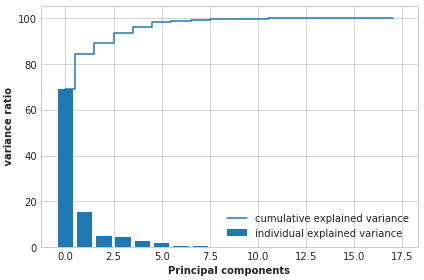

In [213]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(18), var_exp, alpha=1, align='center',
            label='individual explained variance')
    plt.step(range(18), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel(' variance ratio', fontweight = 'bold')
    plt.xlabel('Principal components',fontweight = 'bold')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig('/Users/seemamishra/Desktop/pca2.pdf')

In [214]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(18,1), 
                      eig_pairs[1][1].reshape(18,1)))

print('Matrix W:\n', matrix_w)

('Matrix W:\n', array([[-0.28172785,  0.00427899],
       [ 0.00400562,  0.55673943],
       [-0.27388017,  0.00276459],
       [-0.27742446,  0.01897133],
       [-0.28137471, -0.00903174],
       [-0.28114019,  0.03488098],
       [-0.28138273, -0.0009392 ],
       [ 0.00242118,  0.50888674],
       [ 0.1309407 , -0.01220886],
       [-0.28215501, -0.00650575],
       [-0.27983128, -0.00114527],
       [-0.22579386,  0.02460503],
       [ 0.00584278,  0.42446215],
       [-0.27858528, -0.00284933],
       [ 0.00522219,  0.49639495],
       [-0.26974733, -0.04442833],
       [ 0.27562791, -0.0019473 ],
       [-0.28070304,  0.00552586]]))


In [112]:
Y = X_std.dot(matrix_w)
# Y

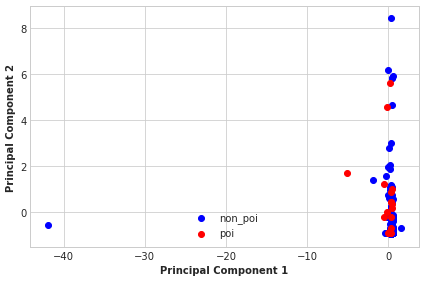

In [216]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('non_poi', 'poi'), 
                        ('blue', 'red')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1',fontweight = 'bold' )
    plt.ylabel('Principal Component 2',fontweight = 'bold')
    plt.legend(loc='lower center')
    plt.tight_layout()